# Basic plotting 


In [2]:
import pandas as pd

# Read in file
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Check the first 5 rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: >

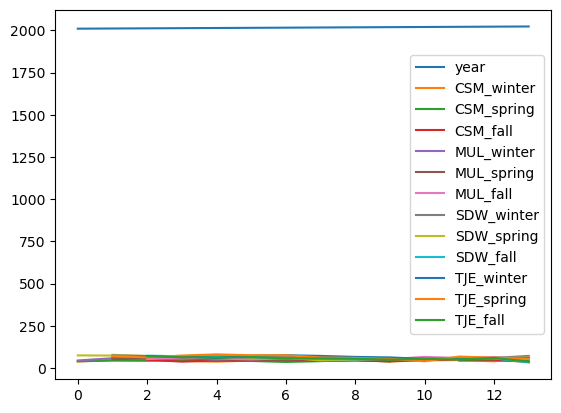

In [3]:
# Default plot(): one line plot per column with numeric data
df.plot()

## Line plots

<Axes: xlabel='year'>

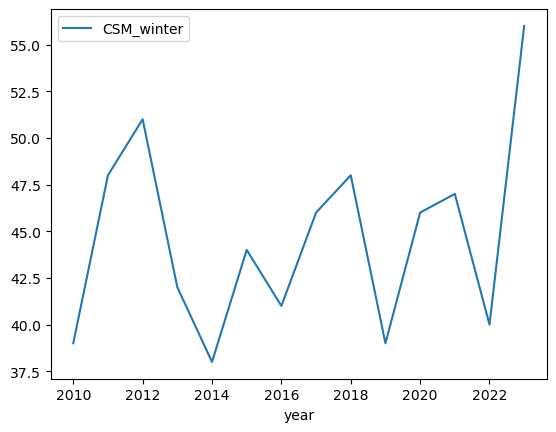

In [4]:
# Birds species registered during winter at CSM yearly
df.plot(x='year', y='CSM_winter')

<Axes: title={'center': 'Bird species registered during winter at Carpinteria Salt Marsh'}, xlabel='Year', ylabel='Number of bird species'>

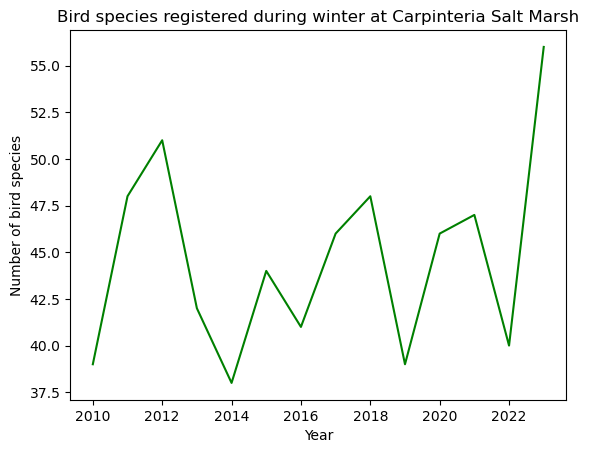

In [5]:
df.plot(x='year', 
        y='CSM_winter',
        title='Bird species registered during winter at Carpinteria Salt Marsh',
        xlabel='Year',
        ylabel='Number of bird species',
        color='green',
        legend=False
        )

## Check-in 
1. Plot a graph of the spring bird surveys at Mugu Lagoon with respect to the years. Include some basic customization.

2. Use the isna() method for pandas.Series and row selection to select the rows in which Mugu Lagoon has NAs during the spring survey.

In [6]:
# Check the column names 
df.dtypes

year            int64
CSM_winter    float64
CSM_spring    float64
CSM_fall      float64
MUL_winter    float64
MUL_spring    float64
MUL_fall      float64
SDW_winter    float64
SDW_spring    float64
SDW_fall      float64
TJE_winter    float64
TJE_spring    float64
TJE_fall      float64
dtype: object

<Axes: title={'center': 'Number of Bird Species Identified in Spring at Mugu Lagoon'}, xlabel='year', ylabel='Number of bird species'>

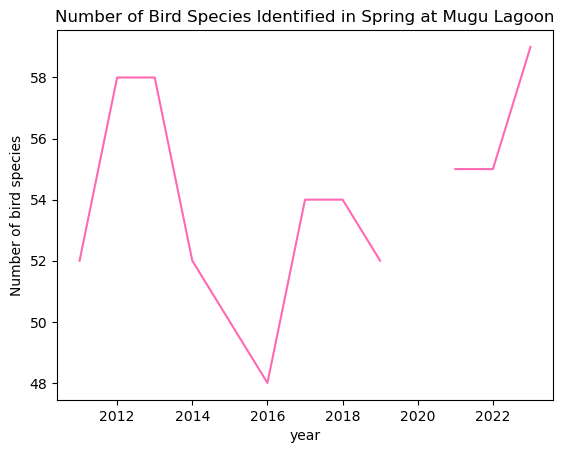

In [9]:
df.plot(x= 'year',
       y = 'MUL_spring',
       title = 'Number of Bird Species Identified in Spring at Mugu Lagoon',
       xlabel = 'year',
       ylabel = 'Number of bird species',
        color = 'hotpink',
       legend = False )

In [10]:
# Select the rows in which Mugu Lagoon has NAs during the spring survey.
na_df = df.isna() # Create a df with booleans for whether na's are present
na_df[na_df['MUL_spring']== True] # Subset for rows where 'MUL_spring' is True

# Alternatively
df[df['MUL_spring'].isna()]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0


## Multiple line plots

<Axes: title={'center': 'Seasonal bird surveys at Tijuana Estuary'}, xlabel='Year', ylabel='Number of bird species'>

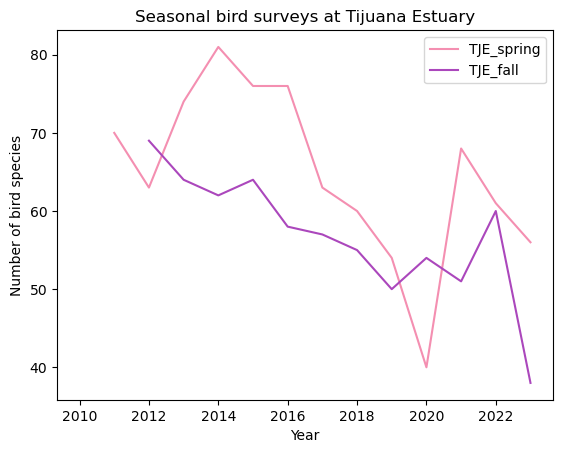

In [42]:
# Graph multiple lines on same graph
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1', # Use hex colors for control over graph look 
                 'TJE_fall': '#AB47BC'
                 }
        )

array([<Axes: xlabel='Year', ylabel='Number of bird species'>,
       <Axes: xlabel='Year', ylabel='Number of bird species'>],
      dtype=object)

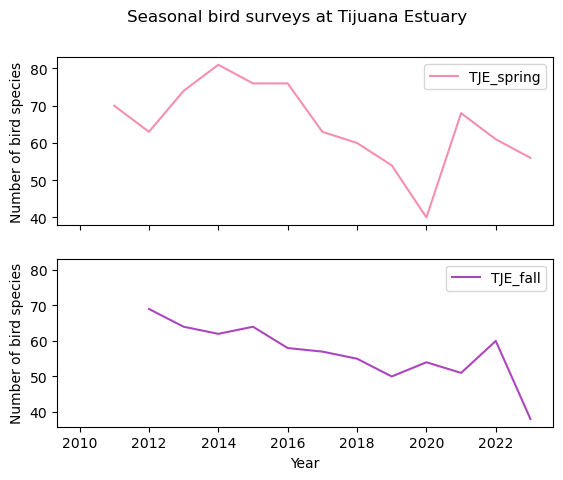

In [53]:
df.plot(x='year', 
        y=['TJE_spring', 'TJE_fall'],
        title = 'Seasonal bird surveys at Tijuana Estuary',
        xlabel='Year',
        ylabel='Number of bird species',        
        color = {'TJE_spring':'#F48FB1',
                 'TJE_fall': '#AB47BC'
                 },
        subplots=True # Graph one line per graph 
        )

## Updating the index

General syntax: 
`df = df.set_index(new_index)`
    A new object is created
    
To update the original df it can be reassigned: 

1.  Set `column_name` column in df as the new index (reassignment)
    `df = df.set_index('column_name')`

OR

2.  Set `column_name` column in df as the new index (modify df in-place)
    `df.set_index('column_name', inplace=True)`
    (DO NOT USE INPLACE)



In [54]:
# Update index to be the year column
df = df.set_index('year')
df.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
year,,,,,,,,,,,,
2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


<Axes: xlabel='year'>

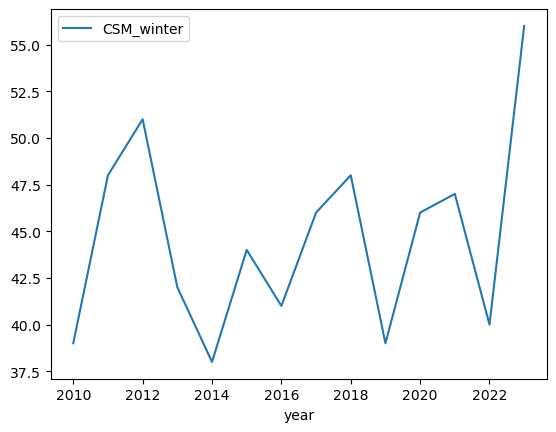

In [56]:
# Simple plot of Carpinteria Salt Marsh winter surveys
# Automatically has year on the x axis as it's the index
df.plot(y='CSM_winter')

## Resetting the index
`df = df.reset_index()`


In [58]:
# Resetting the index 
df = df.reset_index()
df.head()

,index,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


## Check-in 
1. Without running the code, give a step-by-step breakdown of what this code is doing:
`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`

2. Is this code modifying the data frame df? Why or why not?

3. Run the code and examine the graph. Review the data description. Do we have all the necessary information to make sure it makes sense to directly compare the surveys at these different sites?

### Answers

`df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()`
1. `set_index('year')` is resetting the index to year. This is creating a new object as the function does not happen in place.
2. `.loc[:,'SDW_winter':'TJE_fall']` is subsetting for the rows between SDW_winter and TJE_fall'.
3. This new object is being plotted. 

<Axes: xlabel='year'>

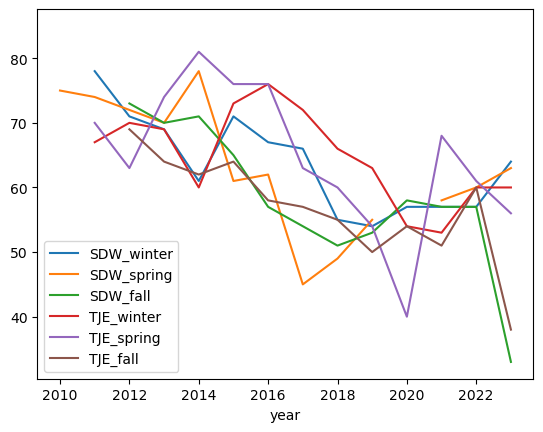

In [66]:
# It would make more sense to compare these graphs for the same season
# Example: One graph for winter, one for spring, and one for fall 
df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()

# Method chaining

Methods are run on the output from the last method. These can be broken up with a panthesis to make the code more readable.

Note: Method chaining should be used only once there is familiarity with the code. Otherwise its helpful to run each operation separately and look at the output

<Axes: xlabel='year'>

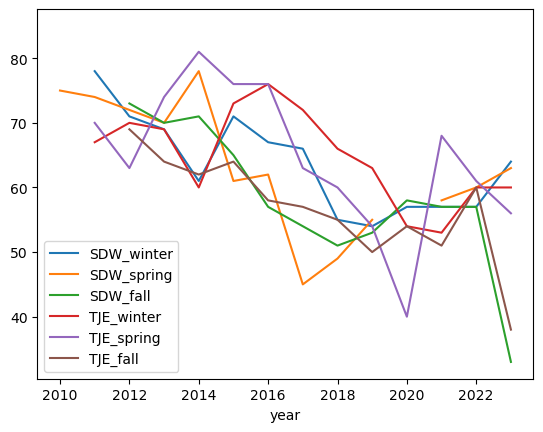

In [67]:
(df.set_index('year')
  .loc[:,'SDW_winter':'TJE_fall']
  .plot()
)

<Axes: xlabel='year'>

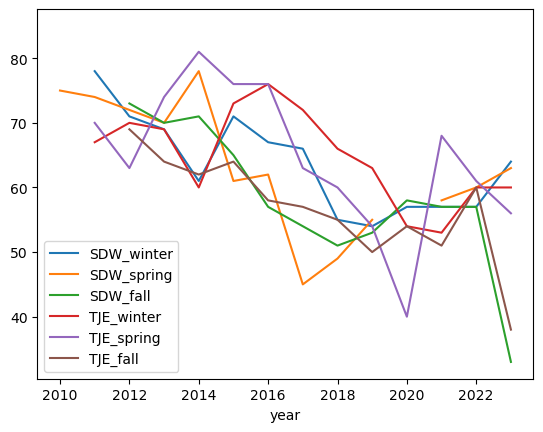

In [69]:
# An alternate way to achieve the same outcome as the above graph
# This is less favorable due to the number of variables created which can be easy to lose track of
year_index_df = df.set_index('year')
subset_df = year_index_df.loc[:,'SDW_winter':'TJE_fall']
subset_df.plot()

# Palmer Penguins
## Data exploration

In [13]:
# Read in data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [75]:
# Check column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [76]:
# Simple statistics about numeric columns
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [77]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [78]:
# Get unique values in species column
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [79]:
# Number of values per unique value in species column
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## `kind` argument in `plot()`

The `kind` argument allows you to make different kinds of plots. 

## Scatter plots
`kind = 'scatter'`

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

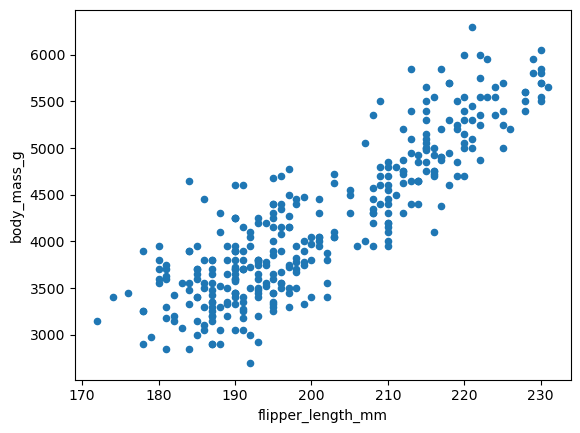

In [81]:
# Plot flipper length versus body mass
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g')

<Axes: title={'center': 'Flipper length and body mass for Palmer penguins'}, xlabel='Flipper length (mm)', ylabel='Body mass (g)'>

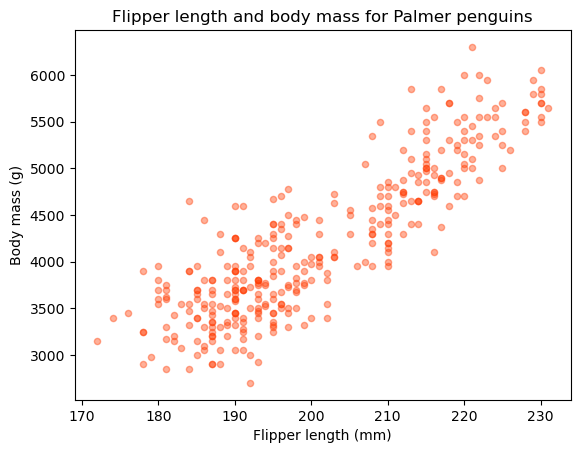

In [83]:
# Plot flipper length versus body mass
penguins.plot(kind='scatter',
              x='flipper_length_mm', 
              y='body_mass_g',
              title='Flipper length and body mass for Palmer penguins',
              xlabel='Flipper length (mm)',
              ylabel='Body mass (g)',
              color='#ff3b01',
              alpha=0.4  # Controls transparency
              )

## Bar plots 
`kind = 'bar'`

In [85]:
# Select for the 10 penguins with the lowest body mass
smallest = penguins['body_mass_g'].nsmallest(10)
smallest

314    2700.0
58     2850.0
64     2850.0
54     2900.0
98     2900.0
116    2900.0
298    2900.0
104    2925.0
47     2975.0
44     3000.0
Name: body_mass_g, dtype: float64

<Axes: >

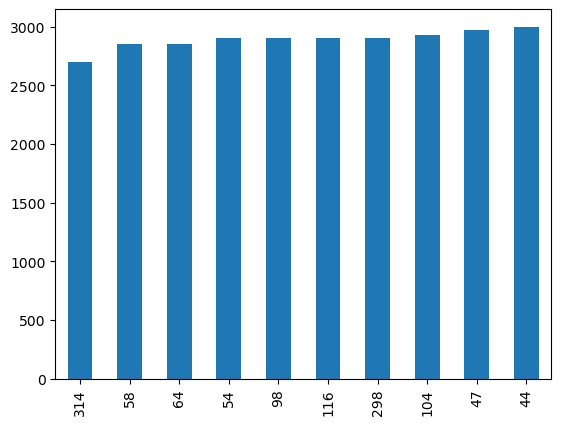

In [87]:
# Plot of the 10 penguins with the lowest body mass
smallest.plot(kind='bar')

In [89]:
# To look at the entirety of the table of the data for the 10 penguins with the lowest body mass
# Move the indexing into the argument
penguins.nsmallest(10, 'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,female,2008
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,female,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
98,Adelie,Dream,33.1,16.1,178.0,2900.0,female,2008
116,Adelie,Torgersen,38.6,17.0,188.0,2900.0,female,2009
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,female,2009
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
44,Adelie,Dream,37.0,16.9,185.0,3000.0,female,2007


## Histogram

`kind = 'hist'`

<Axes: ylabel='Frequency'>

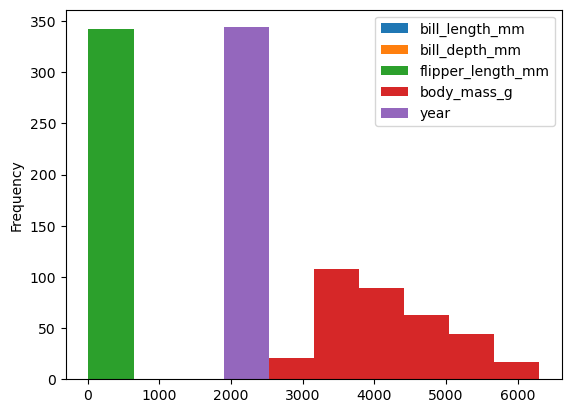

In [90]:
# Using plot without subsetting data - a mess again
penguins.plot(kind='hist')

<Axes: title={'center': 'Penguin flipper lengths'}, xlabel='Flipper length (mm)', ylabel='Frequency'>

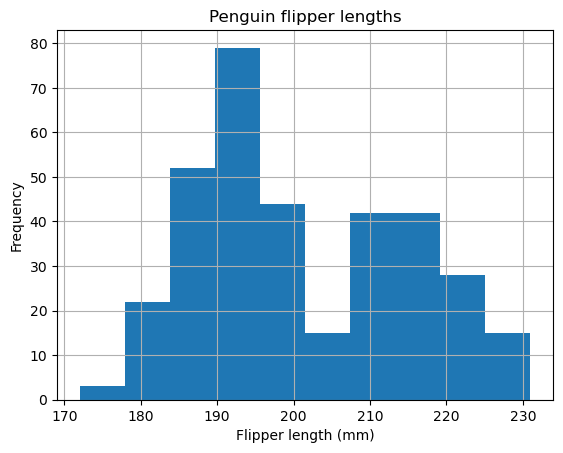

In [91]:
# Distribution of flipper length measurements
# First select data, then plot
penguins['flipper_length_mm'].plot(kind='hist',
                                title='Penguin flipper lengths',
                                xlabel='Flipper length (mm)',
                                grid=True)

## Check-in
1. Select the bill_length_mm and bill_depth_mm columns in the penguins dataframe and then update the kind parameter to box to make boxplots of the bill length and bill depth.

2. Create a simple histogram of the flipper length of female gentoo penguins.

<Axes: title={'center': 'Bill Length & Bill Depth'}, ylabel='Length (mm)'>

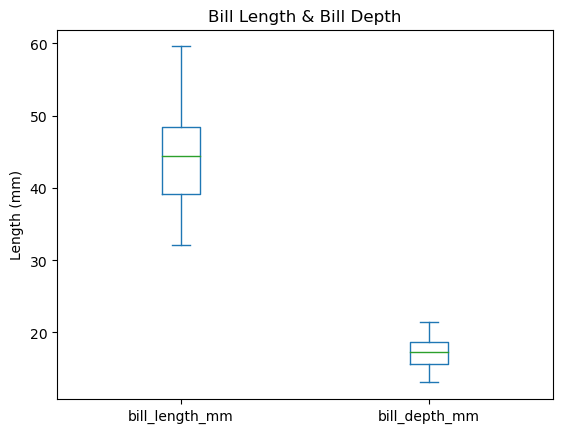

In [95]:
# Box plot for bill length and bill depth 
penguins[['bill_length_mm', 'bill_depth_mm']].plot(kind = 'box',
                                                  title = 'Bill Length & Bill Depth',
                                                  ylabel = 'Length (mm)')

<Axes: title={'center': 'Frequency of Flipper Lengths in Female Gentoo Penguins'}, xlabel='Flipper length (mm)', ylabel='Frequency'>

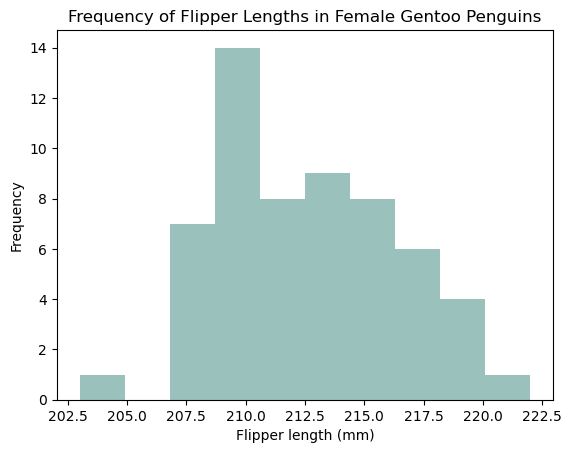

In [106]:
# Subset for female gentoo penguins  
female_gentoos = penguins[(penguins['sex'] == 'female') & (penguins['species'] == 'Gentoo')]

# Create a histogram of flipper length for female gentoo penguins 
female_gentoos['flipper_length_mm'].plot(kind = 'hist',
                                         title = 'Frequency of Flipper Lengths in Female Gentoo Penguins',
                                        xlabel = 'Flipper length (mm)',
                                        color = '#9BC1BC')

<Axes: title={'center': 'Frequency of Flipper Lengths in Female Gentoo Penguins'}, xlabel='Flipper length (mm)', ylabel='Frequency'>

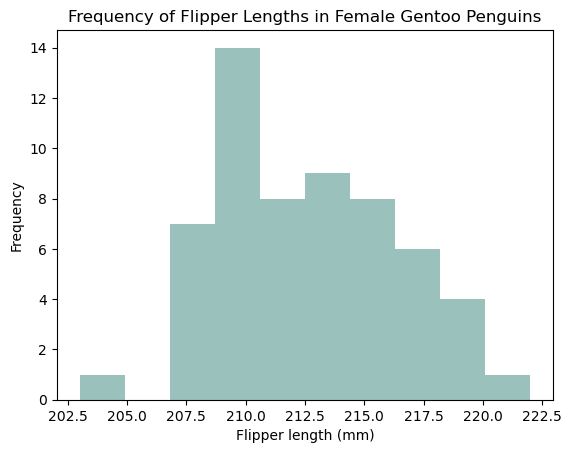

In [16]:
# Alterna
# Create a histogram of flipper length for female gentoo penguins 
penguins.loc[(penguins['sex']=='female')&(penguins['species']== 'Gentoo'), 'flipper_length_mm'].plot(kind = 'hist',
                                         title = 'Frequency of Flipper Lengths in Female Gentoo Penguins',
                                        xlabel = 'Flipper length (mm)',
                                        color = '#9BC1BC')